In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Load text data
with open('auto_correct.txt', 'r', encoding='utf-8') as f:
    text_data = f.read()

# Preview first 500 characters
print(text_data[:500])

# Total words
words_total = len(text_data.split())
print(f"Total words: {words_total}")



This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!

Shakespeare

*This Etext has certain copyright implications you should read!*

<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT
Total words: 901325


In [4]:
# Lowercase all text Preprocessing
text_data = text_data.lower()

# Remove unwanted characters (punctuation, numbers)
text_data_clean = re.sub(r'[^a-z\s]', '', text_data)

# Tokenize words
words = text_data_clean.split()

# Count total words
print(f"Total words: {len(words)}")


Total words: 899836


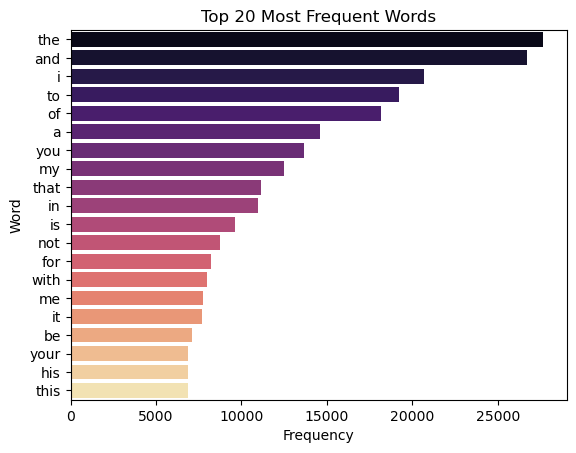

In [5]:
# Count word frequencies Word Frequency Analysis
word_counts = Counter(words)

# Top 20 most common words
most_common_words = word_counts.most_common(20)
df_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot
df_words['Hue'] = df_words['Word']  # temporary hue for Seaborn >0.14
sns.barplot(
    data=df_words,
    x='Frequency',
    y='Word',
    hue='Hue',
    dodge=False,
    palette='magma'
)
plt.legend([], [], frameon=False)
plt.title("Top 20 Most Frequent Words")
plt.show()


In [6]:
# Build bigrams
bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
bigram_counts = Counter(bigrams)

# Autocomplete function
def autocomplete(word, top_n=5):
    suggestions = [w2 for (w1, w2), count in bigram_counts.items() if w1 == word]
    suggestions_counts = Counter(suggestions)
    return suggestions_counts.most_common(top_n)

# Example
autocomplete("the")


[('th', 1), ('future', 1), ('public', 1), ('complete', 1), ('world', 1)]

In [7]:
# Generate edits (Levenshtein distance 1)
def edits1(word):
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes    = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts    = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

# Autocorrect function
def autocorrect(word):
    candidates = edits1(word)
    known_candidates = {w: word_counts[w] for w in candidates if w in word_counts}
    if known_candidates:
        return max(known_candidates, key=known_candidates.get)
    return word

# Example
autocorrect("exampl")  # returns 'example'


'example'

In [8]:
# Sample misspelled words
misspelled_words = ["exampl", "recieve", "teh", "speling"]
for word in misspelled_words:
    corrected = autocorrect(word)
    print(f"{word} -> {corrected}")


exampl -> example
recieve -> receive
teh -> the
speling -> spelling


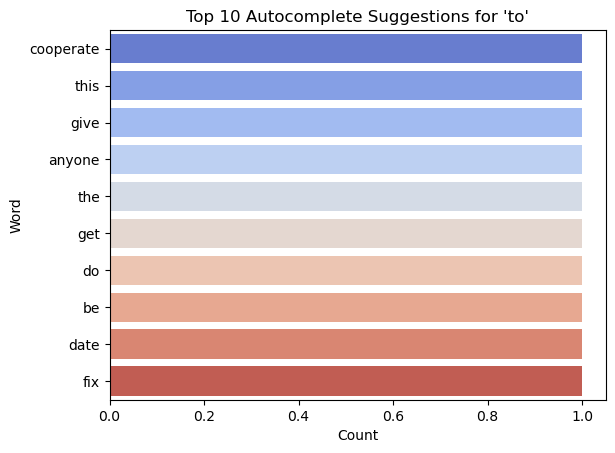

In [9]:
# Top suggestions for "to"
suggestions = autocomplete("to", top_n=10)
df_suggest = pd.DataFrame(suggestions, columns=['Word', 'Count'])
df_suggest['Hue'] = df_suggest['Word']

sns.barplot(
    data=df_suggest,
    x='Count',
    y='Word',
    hue='Hue',
    dodge=False,
    palette='coolwarm'
)
plt.legend([], [], frameon=False)
plt.title("Top 10 Autocomplete Suggestions for 'to'")
plt.show()


In [10]:
print("""
📌 Key Recommendations:

1. Use higher-order n-grams (trigrams or 4-grams) for more accurate autocomplete.
2. Leverage full vocabulary from large corpora for better autocorrect coverage.
3. Optimize edit distance algorithms for speed and efficiency.
4. Consider machine learning models (RNN, Transformer) for predictive text.
5. Visualize autocomplete predictions and autocorrect accuracy for user insights.

""")



📌 Key Recommendations:

1. Use higher-order n-grams (trigrams or 4-grams) for more accurate autocomplete.
2. Leverage full vocabulary from large corpora for better autocorrect coverage.
3. Optimize edit distance algorithms for speed and efficiency.
4. Consider machine learning models (RNN, Transformer) for predictive text.
5. Visualize autocomplete predictions and autocorrect accuracy for user insights.


